In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D, Conv2D, Flatten
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers.legacy import RMSprop
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

In [12]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

print('CIFAR100 Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

CIFAR100 Dataset Shape:
X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)


In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

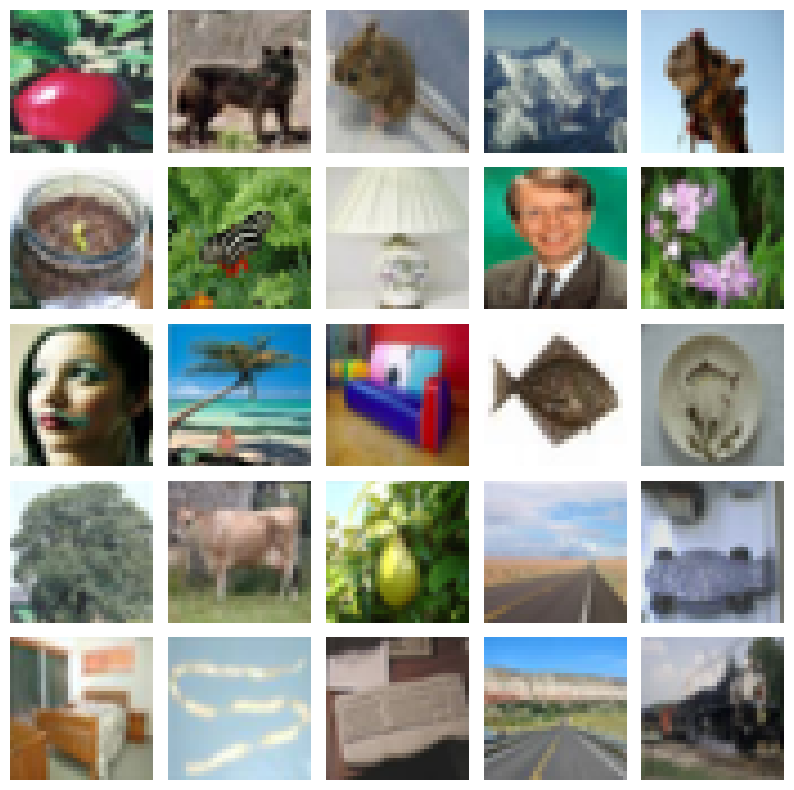

In [14]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Set the random seed for reproducibility
np.random.seed(1)

# Select 25 random indices
indices = np.random.choice(range(len(X_train)), size=25, replace=False)

for i, idx in enumerate(indices):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    
plt.show()

In [15]:
# Building CNN model

model = Sequential(
    [
        Conv2D(filters=32, kernel_size = (3, 3), padding='same', 
               activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(filters=64, kernel_size = (3, 3), padding='same', 
               activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(filters=128, kernel_size = (3, 3), padding='same', 
               activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(filters=256, kernel_size = (3, 3), padding='same', 
               activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dropout(0.5),
        Dense(units=512, activation='relu'),
        Dense(units=100, activation='softmax')
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

Notice that we used the `padding = "same"` argument to Conv2D(), which ensures that the output channels have the same dimension as the input channels. 

In [16]:
model.compile(
    loss=CategoricalCrossentropy(),
    optimizer=RMSprop(),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=30, 
                    batch_size=128, validation_split=0.2)

Epoch 1/30
313/313 [==============================] - 15s 48ms/step - loss: 4.1685 - accuracy: 0.0597 - val_loss: 3.7455 - val_accuracy: 0.1174
Epoch 2/30
313/313 [==============================] - 16s 50ms/step - loss: 3.5589 - accuracy: 0.1566 - val_loss: 3.4174 - val_accuracy: 0.1897
Epoch 3/30
313/313 [==============================] - 16s 52ms/step - loss: 3.2205 - accuracy: 0.2164 - val_loss: 3.2071 - val_accuracy: 0.2239
Epoch 4/30
313/313 [==============================] - 16s 52ms/step - loss: 2.9797 - accuracy: 0.2599 - val_loss: 3.0784 - val_accuracy: 0.2493
Epoch 5/30
313/313 [==============================] - 16s 53ms/step - loss: 2.7817 - accuracy: 0.2971 - val_loss: 2.7730 - val_accuracy: 0.3131
Epoch 6/30
313/313 [==============================] - 16s 52ms/step - loss: 2.6138 - accuracy: 0.3321 - val_loss: 2.5804 - val_accuracy: 0.3425
Epoch 7/30
313/313 [==============================] - 16s 51ms/step - loss: 2.4530 - accuracy: 0.3666 - val_loss: 2.6251 - val_accuracy:

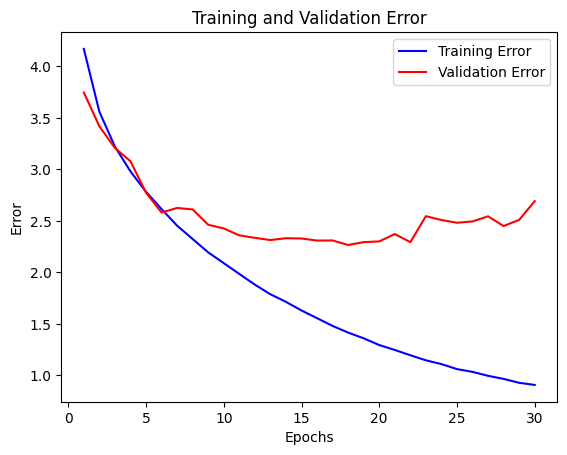

In [17]:
# Plotting Training Error and Validation Error on each epoch
train_errors = history.history['loss']
val_errors = history.history['val_loss']

epochs = np.arange(1, len(train_errors)+1)
plt.plot(epochs, train_errors, 'b-', label='Training Error')
plt.plot(epochs, val_errors, 'r-', label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training and Validation Error')
plt.legend()
plt.show()

In [18]:
# Accuracy score over test set
model.evaluate(X_test, y_test)[1]

313/313 [==============================] - 2s 6ms/step - loss: 2.6280 - accuracy: 0.4337


0.43369999527931213